



### Proud Boys vs. Anarcho-Capitalists: A Binary Image Classification Neural Network

**Note:** This model is for evaluation purposes only. For employment opportunities or to use, reproduce, or alter the model and its dataset, please email [Nicolasneuralnetworks@proton.me] for permission.

#### Objective
The primary goal of this model is to differentiate images from Proudboys and Anarcho-Capitalists (Ancap) social media networks. Both groups have seen a resurgence due to accelerationism during Covid. Proudboys, designated as an extremist organization by the Canadian government, has a history of inciting violent acts. Ancap, a political philosophy advocating for state elimination in favor of individual sovereignty, private property, and open markets, believes in replacing government functions with a free-market economic system and voluntary associations. Proud boys use of violence places it in a different category than the Ancap movement and as such, ensuring AI has the ability to distinguish between each group is imperative. 

This task was also chosen as it presents a difficult classification task due to the substantial visual similarities and shared elements between the two groups. Yellow and black, symbols of support for libertarianism and capitalism, are used by both groups as Proud Boys ideological support for economic libertarinism resulted in the group selecting yellow and black as identifying colours. 

#### The Dataset
A custom dataset of over 900 images was created, gathered from open sources such as Telegram, Mewe, Gab, DeviantArt, Meta, Instagram, and Reddit. The dataset comprises a diverse collection of publicly shared images that are indicative of each group. It is a diverse set, reflecting the groups global affilates and languages and was designed to ensure it reflects all imagery that is indicative of the groups. Images have been specifically chosen to over come the similarities that could cause misclassification and over fitting such as the use of yellow and black  flags by both groups. 
Originally, the model used automated preprocessing and augmentation, however this led to the loss of crucial elements for accurate classification. To address this, external preprocessing was conducted using the Pillow library. This allowed for visual inspection of augmented images, ensuring only those maintaining key elements were included in the dataset. Augmentation techniques included:

- **Rotation:** Rotation of images at various angles aids the model in learning from non-aligned images.
- **Translation:** Horizontal or vertical shifts add variability in object placement.
- **Rescaling:** This ensures the model adapts to different object sizes.
- **Cropping:** Focusing on different regions enhances learning from various image aspects.
- **Colour Processing:** Normalisation or adjustment of colour values reduces variances and ensures accurate categorisation across different conditions.

These steps were crucial in preserving the integrity of the images' identifying features, ensuring their utility in training a robust classification model.

#### Model Architecture

The model first incorporated the use of models such as YOLO and Resnet however, this ultimately caused overfitting and the model performed the best using a  TensorFlow and Keras sequential architecture typical for image classification tasks. It includes:

- **Convolutional Layers:** Three layers (with 16, 32, and 64 filters) extract image features, each followed by batch normalisation and max pooling.
- **Flattening and Dense Layers:** Post-convolution, the data is flattened and passed through a 256-neuron dense layer.
- **Output Layer:** The final layer is a dense layer with a single neuron employing a sigmoid activation function, ideal for binary classification.
- **Training and Validation:** The dataset is split into training, validation, and test sets to assess generalisation capabilities and prevent fitting issues.
- **Optimization and Loss Function:** An Adam optimizer with a lower learning rate balances training speed and stability. Binary cross entropy is used as the loss function.
- **Callbacks and Training Monitoring:** Custom callbacks for early stopping and TensorBoard for performance insights are implemented.

This model demonstrates an effective approach to a nuanced binary classification problem, differentiating between the complex visual patterns of ProudBoys and Ancap ideologies despite their similarities. The careful design, strategic training, and evaluation techniques render this model a robust solution for the classification task, achieving 100% accuracy without under or overfitting.



In [18]:
import numpy as np #Importing dependencies
import pandas as pd 
import tensorflow as tf 
import cv2 
import imghdr 
import matplotlib.pyplot as plt 
import seaborn

import os # Importing the os module for interacting with the operating system, like file paths
# Iterating over directories and files in a specified path, typically used for reading datasets in Kaggle kernels
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames: 
        print(os.path.join(dirname, filename)) # Printing the full path of each file found



/kaggle/input/proudboyandancapimages/ProudboysAncapimages/ANCAP/003380.png
/kaggle/input/proudboyandancapimages/ProudboysAncapimages/ANCAP/001840.png
/kaggle/input/proudboyandancapimages/ProudboysAncapimages/ANCAP/000920.png
/kaggle/input/proudboyandancapimages/ProudboysAncapimages/ANCAP/000370.png
/kaggle/input/proudboyandancapimages/ProudboysAncapimages/ANCAP/002050.png
/kaggle/input/proudboyandancapimages/ProudboysAncapimages/ANCAP/000750.png
/kaggle/input/proudboyandancapimages/ProudboysAncapimages/ANCAP/001910.png
/kaggle/input/proudboyandancapimages/ProudboysAncapimages/ANCAP/002530.png
/kaggle/input/proudboyandancapimages/ProudboysAncapimages/ANCAP/001680.png
/kaggle/input/proudboyandancapimages/ProudboysAncapimages/ANCAP/003880.png
/kaggle/input/proudboyandancapimages/ProudboysAncapimages/ANCAP/002070.png
/kaggle/input/proudboyandancapimages/ProudboysAncapimages/ANCAP/001450.png
/kaggle/input/proudboyandancapimages/ProudboysAncapimages/ANCAP/001300.png
/kaggle/input/proudboyand

## Establishing the data pipeline and image verification

This script is useful for cleaning up an image dataset by ensuring that all images are of the desired format. It reads each image and checks its format, removing any files that do not match the specified extensions. This is an important step in preprocessing, especially when dealing with large and diverse datasets where some images might be corrupted or in an unsupported format. It finishes with a print statement if images are removed. 






In [19]:
import os
import cv2
import imghdr
import tensorflow as tf

# Directory path for the dataset
dir= '/kaggle/input/proudboysancapimageset/PBAC'
data_dir = '/kaggle/input/proudboysancapimageset/PBAC'

# Load the dataset using TensorFlow's utility function
data = tf.keras.utils.image_dataset_from_directory('/kaggle/input/proudboysancapimageset/PBAC') 

# List of accepted image extensions
image_exts = ['bmp', 'png']

# Iterate over each class/category in the dataset directory
for image_class in os.listdir(data_dir): 
    # Iterate over each image file in the class/category directory
    for image in os.listdir(os.path.join(data_dir, image_class)):
        # Construct the full path of the image
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            # Read the image file using OpenCV
            img = cv2.imread(image_path)
            # Check the file extension using imghdr
            tip = imghdr.what(image_path) 
            # If the image extension is not in the accepted list, print a message and remove it
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            # Print a message if there's an issue with reading the image
            print('Issue with image {}'.format(image_path))

         


## Visualizing a Subset of Images

### Creating a Numpy Iterator for the Dataset
- `data_iterator = data.as_numpy_iterator()`: This creates an iterator for the `data` dataset that allows you to extract data as Numpy arrays. This is useful for visualizing the images outside of TensorFlow's processing pipeline.
- `batch = data_iterator.next()`: This fetches the next batch of data (both images and labels) from the dataset.

### Setting Up Matplotlib for Visualization
- `fig, ax = plt.subplots(ncols=8, figsize=(20, 20))`: A Matplotlib figure with 8 subplots (axes) is created, arranged in one row. The figure size is set to 20x20 inches to accommodate the images.

### Displaying Images from the Batch
- The `for` loop iterates over the first 8 images in the batch. This is a typical method to visualize a small sample of data.
- `ax[idx].imshow(img.astype(np.uint8))`: Each image is displayed in one of the subplots. The images are converted to the `uint8` data type for correct visualization, as Matplotlib expects images in the range of 0 to 255 for RGB.
- `ax[idx].title.set_text(str(batch[1][idx]))`: The title of each subplot is set to the corresponding label of the image, converted to a string for compatibility with Matplotlib.
- `ax[idx].axis('off')`: The axis lines and labels are turned off for each subplot for a cleaner visualization.

### Rendering the Plot
- `plt.show()`: This command renders the plot and displays the grid of images. It's a standard method in Matplotlib to visualize the figures.

This code is particularly useful for inspecting a batch of images from a dataset, along with their labels. It allows for a quick visual check to ensure that the images are loaded correctly and that their associated labels are accurate. This type of visualization is often used in data exploration and debugging stages of building machine learning models, especially in image classification tasks.





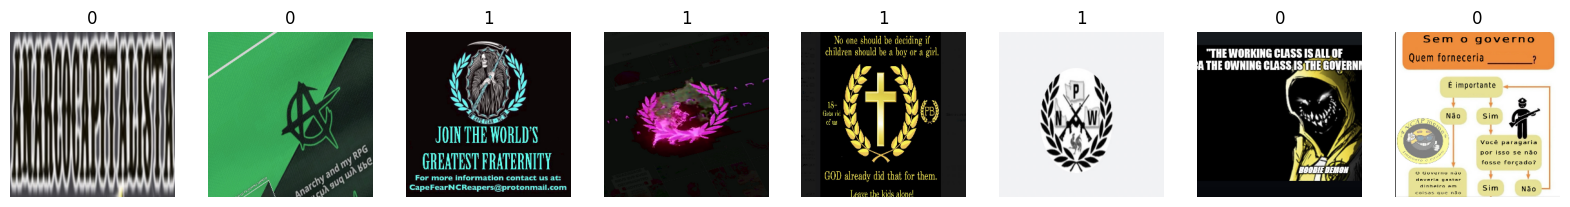

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  

data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

fig, ax = plt.subplots(ncols=8, figsize=(20, 20))  
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(np.uint8))  # Images are often displayed better using uint type
    ax[idx].title.set_text(str(batch[1][idx]))  # Ensure title is converted to string
    ax[idx].axis('off') 

plt.show()  # Display the plot

# Data split

**Scaling the Image Data**:
    - `scaled_data = data.map(lambda x, y: (x / 255, y))`: This line scales the pixel values of each image in the dataset `data`. The scaling is done by dividing each pixel value by 255, which transforms the pixel values to a range between 0 and 1. This normalization is a common practice in image processing as it helps models learn more efficiently.

**Creating a Numpy Iterator for the Dataset**:
    - `data_iterator = scaled_data.as_numpy_iterator()`: This creates an iterator for the `scaled_data` dataset. The iterator allows the extraction of data in Numpy array format, which is useful for model training and evaluation.
    - `batch = data_iterator.next()`: This fetches the next batch of data (both images and labels) from the dataset.

**Splitting the Dataset**:
    - The dataset is divided into training (`train`), validation (`val`), and test (`test`) sets based on specified proportions.
    - `train = data.take(train_size)`: This line takes the first 80% of the data for training.
    - `val = data.skip(train_size).take(val_size)`: This skips the first 80% of the data and then takes the next 15% for validation.
    - `test = data.skip(train_size+val_size).take(test_size)`: This skips the first 95% (training and validation) and takes the remaining 5% for testing.

**Counting Images by Label**:
    - `def count_images(dataset)`: This function is defined to count the number of images associated with each label ('Ancap' and 'Proud boys') in a given dataset. It iterates through the dataset, summing the occurrences of each label.
    - The counts are returned as a Pandas DataFrame for better readability and display.

**Displaying the Counts for Each Dataset Split**:
    - The `count_images` function is called for each dataset split (training, validation, and test) to display the distribution of labels.

The code is useful for preprocessing image data for machine learning tasks, particularly when working with labeled images for classification. It ensures that the data is properly normalized, split into appropriate subsets for training and evaluation, and allows for an analysis of the label distribution within each subset. This reduces the potential for over or underfitting



In [34]:
# Scale the image data
scaled_data = data.map(lambda x, y: (x / 255, y))

# Create a numpy iterator and get the next batch 
data_iterator = scaled_data.as_numpy_iterator() 
batch = data_iterator.next()

# batch contains the scaled images and their labels 
train_size = int(len(data)*.80)
val_size = int(len(data)*.15)
test_size = int(len(data)*.05) 
train = data.take(train_size) 
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size) 
def count_images(dataset):
    label_counts = {'Ancap': 0, 'Proudboys': 0}
    for _, labels in dataset.as_numpy_iterator():
        # Counting the number of 'ancap' (0) and 'proudboy' (1) labels
        label_counts['Ancap'] += np.sum(labels == 0)
        label_counts['Proudboys'] += np.sum(labels == 1)
    return pd.DataFrame([label_counts], index=['Count'])

# Displaying the counts for each dataset
print("Training Data:")
print(count_images(train))
print("\nValidation Data:")
print(count_images(val))
print("\nTest Data:")
print(count_images(test))

train 

Training Data:
       Ancap  Proudboys
Count    327        441

Validation Data:
       Ancap  Proudboys
Count     58         70

Test Data:
       Ancap  Proudboys
Count     17         15


<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

## Model architecture

**Sequential Model**: This is a linear stack of layers in Keras.

**Conv2D Layers**: These are convolutional layers that extract features from the input images.It has three Conv2D layers with 16, 32, and 64 filters respectively. Each uses a 3x3 kernel and a stride of 1. The 'relu' (Rectified Linear Unit) activation function is used here.

**BatchNormalization Layers**: Following each Conv2D layer, there is a BatchNormalization layer. These layers normalize the activations from the previous layer at each batch, i.e., it maintains the mean activation close to 0 and the activation standard deviation close to 1. This can help speed up training and reduce the sensitivity to network initialization.

**MaxPooling2D Layers**: After each BatchNormalization layer, there is a MaxPooling2D layer. These layers reduce the spatial dimensions (height and width) of the input, which helps reduce the number of parameters and computation in the network, and also helps control overfitting.

**Flatten Layer**: After the last MaxPooling2D layer, a Flatten layer is used to flatten the input. This is necessary because Dense layers expect input to be 1D arrays, but the output of Conv2D and MaxPooling2D layers are 3D tensors.

**Dense Layers**: After flattening the input, the model has two Dense (or fully connected) layers. The first Dense layer has 256 neurons and uses the 'relu' activation function. The final Dense layer has 1 neuron (as it's for binary classification) and uses the 'sigmoid' activation function, which is typical for binary classification tasks as it outputs a value between 0 and 1, representing the probability of one class.

**Adam Optimizer**: The model uses the Adam optimizer with a low learning rate of 0.00001. Adam is an optimization algorithm that can handle sparse gradients on noisy problems, and the low learning rate can help with a more precise convergence.

**Binary Crossentropy Loss Function**: The loss function used is binary crossentropy, which is a standard loss function for binary classification problems.

**Metrics**: The model uses 'accuracy' as a metric to evaluate the performance during training and testing.

**Model.compile**: This method is used to configure the model for training. It includes setting the optimizer, loss function, and metrics.

Finally we have the model.summary() This method is used to print a summary representation of your model, showing the layers and their order, along with the output shapes and the number of parameters at each layer.

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# Adding layers
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D()) 
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Flatten()) 
model.add(Dense(512, activation='relu')) 
model.add(Dense(1, activation='sigmoid')) 


# Adjust the optimizer with a fine-tuned learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate= 0.00001) 

# Compile the model
model.compile(optimizer, loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy']) 
model.summary() 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 batch_normalization_9 (Bat  (None, 256, 256, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 128, 128, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 128, 128, 64)      18496     
                                                                 
 batch_normalization_10 (Ba  (None, 128, 128, 64)      256       
 tchNormalization)                                               
                                                      

## Callback, training, and fit functions ##

**TensorBoard Callback (TensorBoard)**: This is used for visualization of the training process. By specifying a log directory (logdir), TensorBoard records logs during model training. These logs can then be visualized in the TensorBoard web interface to monitor metrics like loss and accuracy, view the model graph, and analyze other statistics like weights and biases.

**Custom Callback for Accuracy (myCallback)**: This is a custom callback class derived from tf.keras.callbacks.Callback. It defines a specific behavior at the end of each epoch:

- The on_epoch_end method checks if the accuracy of the model has reached 100% (logs.get('accuracy') >= 1.0).
If 100% accuracy is achieved, it prints a message and stops the training early (self.model.stop_training = True). This is a form of early stopping, which is useful for preventing overfitting and reducing computational waste.
Custom Callback for Training Completion (TrainingCompleteCallback):This prints a message when the training process is finished.

- The on_train_end method is called when the training ends, and it simply prints "Training has completed."
Callback Usage in Model Training (model.fit):

- In the model.fit method, these callbacks (tensorboard_callback, training_complete_callback, accuracy_callback) are passed as a list to the callbacks parameter.
The model will execute these callbacks at their respective stages in the training process.

**Model Training**:

The model is trained on the train dataset for a maximum of 100 epochs (epochs=100), and the val dataset is used for validation.
During training, the callbacks monitor the training process, allowing for early stopping if 100% accuracy is achieved and logging the progress for visualization in TensorBoard.
This setup is particularly useful for monitoring the training process, getting insights into the model's learning, and potentially stopping training early if the desired accuracy is already achieved. It is also designed to avoid overfitting which can occur on a more complex model and dataset if training is prolonged.

In [36]:
from tensorflow.keras.callbacks import TensorBoard
import tensorflow as tf

# Set up the log directory for TensorBoard
logdir = './logs'

# Custom callback for monitoring accuracy
class myCallback(tf.keras.callbacks.Callback):
    # Function called at the end of each epoch
    def on_epoch_end(self, epoch, logs={}):
        # Stop training once accuracy reaches 100%
        if logs.get('accuracy') is not None and logs.get('accuracy') >= 1.0:
            print("\nReached 100% accuracy so cancelling training!")
            self.model.stop_training = True

# Custom callback for signaling the end of training
class TrainingCompleteCallback(tf.keras.callbacks.Callback): 
    # Function called when training ends
    def on_train_end(self, logs=None):
        print("Training has completed.")

# Instantiate the custom callbacks
accuracy_callback = myCallback()
training_complete_callback = TrainingCompleteCallback()

# Set up TensorBoard callback for training visualization
tensorboard_callback = TensorBoard(log_dir=logdir)

# Fit the model with the specified callbacks
hist = model.fit(
    train, 
    epochs=100, 
    validation_data=val, 
    callbacks=[tensorboard_callback, training_complete_callback, accuracy_callback]
)


Epoch 1/100
24/24 [==============================] - 29s 976ms/step - loss: 0.9229 - accuracy: 0.6693 - val_loss: 0.6102 - val_accuracy: 0.7422
Epoch 2/100
24/24 [==============================] - 27s 991ms/step - loss: 0.2362 - accuracy: 0.9180 - val_loss: 0.4506 - val_accuracy: 0.7578
Epoch 3/100
24/24 [==============================] - 26s 974ms/step - loss: 0.0815 - accuracy: 0.9792 - val_loss: 0.3577 - val_accuracy: 0.8438
Epoch 4/100
24/24 [==============================] - 27s 990ms/step - loss: 0.0451 - accuracy: 0.9922 - val_loss: 0.3066 - val_accuracy: 0.8516
Epoch 5/100
24/24 [==============================] - 26s 965ms/step - loss: 0.0293 - accuracy: 0.9961 - val_loss: 0.1771 - val_accuracy: 0.9688
Epoch 6/100
24/24 [==============================] - 27s 978ms/step - loss: 0.0314 - accuracy: 0.9922 - val_loss: 0.1115 - val_accuracy: 0.9922
Epoch 7/100
24/24 [==============================] - 27s 988ms/step - loss: 0.0169 - accuracy: 0.9987 - val_loss: 0.0975 - val_accuracy:

## Model save
A function to ensure the model is saved and can be called during post run evaluations

In [37]:
model.save('/kaggle/working/my_model')

# Post run evaluations

A simple graph to visually check for over or under fitting. We see that the validation sets accuracy improves as the model runs, with both training and validation accuracy reaching 100%.

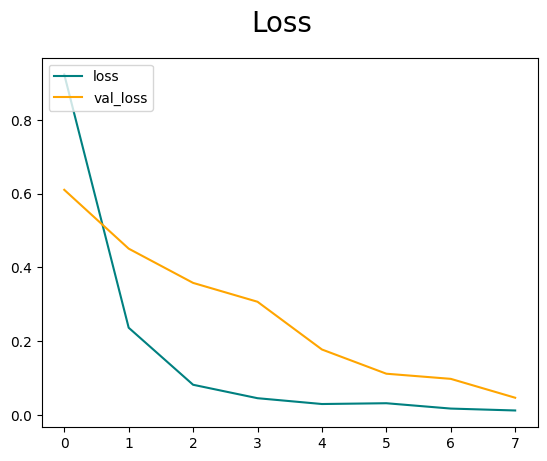

In [38]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show() 

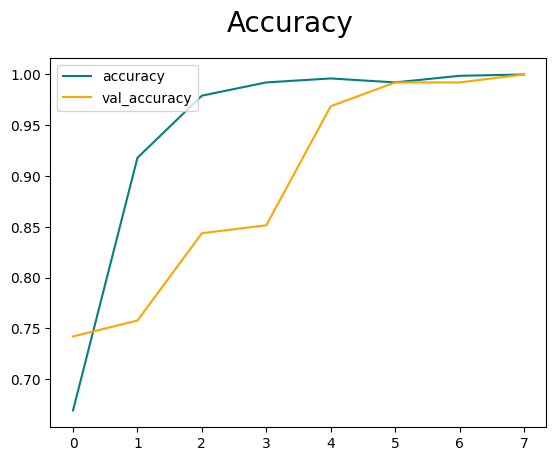

In [39]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Precision and Recall metrics

This code block is designed for evaluating a TensorFlow model's performance on a test dataset. We can see that the model preforms perfectly with a 1.0 outcome on all metrics.

 **Import Necessary Libraries**:
   - `numpy`, `matplotlib.pyplot`, and `seaborn` are imported for numerical operations and data visualization.
   - `sklearn.metrics` provides functions to compute various performance metrics.
   - `tensorflow` is used for handling the model and dataset.

**Prepare Test Data**:
   - `test_images, test_labels = next(test.as_numpy_iterator())`: This extracts one batch of images and their corresponding labels from the test dataset using TensorFlow's `as_numpy_iterator` method. 

**Model Predictions**:
   - `y_pred = model.predict(test_images)`: The model makes predictions on the test images.
   - `y_pred = [1 if pred > 0.5 else 0 for pred in y_pred.flatten()]`: The predictions are then processed to convert them into binary labels (0 or 1), based on a threshold of 0.5. This is a standard approach for binary classification tasks.

**Calculate Performance Metrics**:
   - Various performance metrics are calculated using the true labels (`test_labels`) and the predicted labels (`y_pred`):
   - `accuracy = accuracy_score(test_labels, y_pred)`: The accuracy metric calculates the proportion of correctly predicted labels.
   - `precision = precision_score(test_labels, y_pred)`: Precision measures the proportion of positive identifications that were actually correct.
   - `recall = recall_score(test_labels, y_pred)`: Recall (or sensitivity) measures the proportion of actual positives that were identified correctly.
   - `f1 = f1_score(test_labels, y_pred)`: The F1 Score is the harmonic mean of precision and recall, providing a balance between them.

**Print Metrics**:
   - The calculated metrics (accuracy, precision, recall, and F1 score) are printed out. These provide insights into the model's performance, especially how well it manages the trade-off between precision and recall, and its overall accuracy.



In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import tensorflow as tf

# Assuming 'test' is your test dataset
test_images, test_labels = next(test.as_numpy_iterator())

# Get predictions
y_pred = model.predict(test_images)
y_pred = [1 if pred > 0.5 else 0 for pred in y_pred.flatten()]

# Calculate metrics
accuracy = accuracy_score(test_labels, y_pred)
precision = precision_score(test_labels, y_pred)
recall = recall_score(test_labels, y_pred)
f1 = f1_score(test_labels, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

1/1 [==============================] - 0s 113ms/step
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


## Visually evaulating results on the test set

This code block is designed for evaluating a TensorFlow model's performance on a test dataset by predicting the label and visualize the prediction against the actual label. As we can see the evaluation predicts every label correctly validating the model is able to distiniguish between Proudboy and Ancap images with 100% accuracy.

**Import Necessary Libraries**:
   - `numpy`, `matplotlib.pyplot`, and `seaborn` are imported for numerical operations and data visualization.
   - `sklearn.metrics` provides functions to compute various performance metrics.
   - `tensorflow` is used for handling the model and dataset.

**Prepare Test Data**:
   - `test_images, test_labels = next(test.as_numpy_iterator())`: This extracts one batch of images and their corresponding labels from the test dataset using TensorFlow's `as_numpy_iterator` method. 

**Model Predictions**:
   - `y_pred = model.predict(test_images)`: The model makes predictions on the test images.
   - `y_pred = [1 if pred > 0.5 else 0 for pred in y_pred.flatten()]`: The predictions are then processed to convert them into binary labels (0 or 1), based on a threshold of 0.5. This is a standard approach for binary classification tasks.

**Calculate Performance Metrics**:
   - Various performance metrics are calculated using the true labels (`test_labels`) and the predicted labels (`y_pred`):
   - `accuracy = accuracy_score(test_labels, y_pred)`: The accuracy metric calculates the proportion of correctly predicted labels.
   - `precision = precision_score(test_labels, y_pred)`: Precision measures the proportion of positive identifications that were actually correct.
   - `recall = recall_score(test_labels, y_pred)`: Recall (or sensitivity) measures the proportion of actual positives that were identified correctly.
   - `f1 = f1_score(test_labels, y_pred)`: The F1 Score is the harmonic mean of precision and recall, providing a balance between them.

**Print Metrics**: The calculated metrics (accuracy, precision, recall, and F1 score) are printed out. These provide insights into the model's performance, especially how well it manages the trade-off between precision and recall, and its overall accuracy.

This approach is comprehensive for evaluating binary classification models and gives a clear indication of the model's performance across different aspects, not just its accuracy. Such an evaluation is crucial in many real-world applications where the costs of false positives and false negatives vary significantly.


1/1 [==============================] - 0s 43ms/step


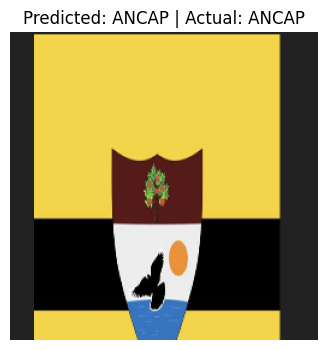

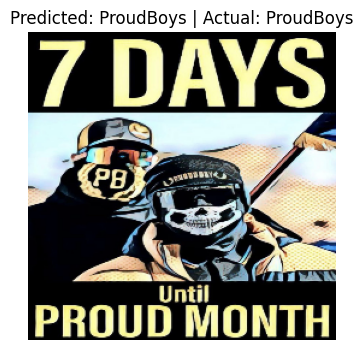

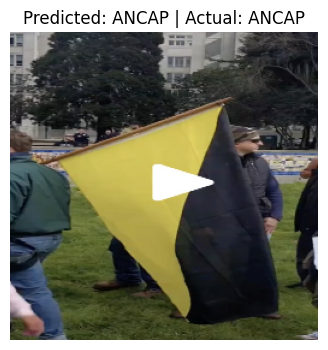

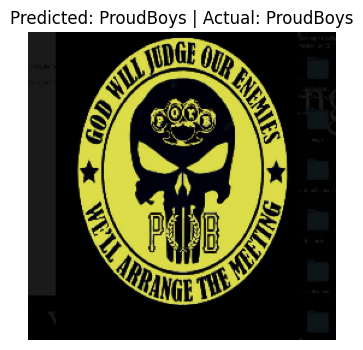

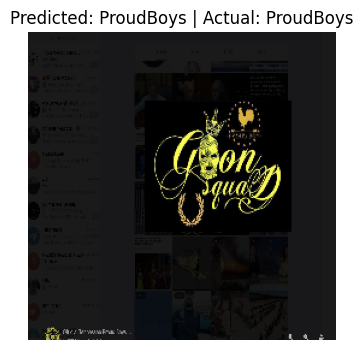

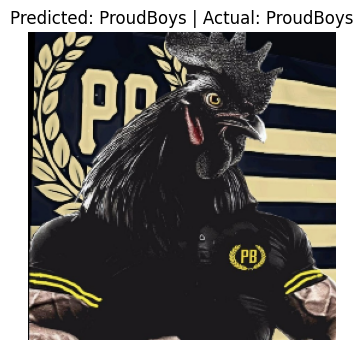

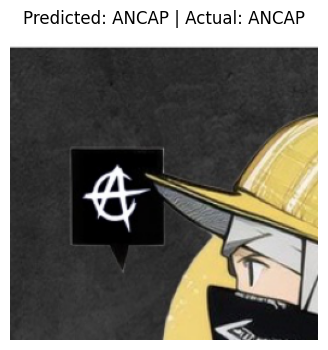

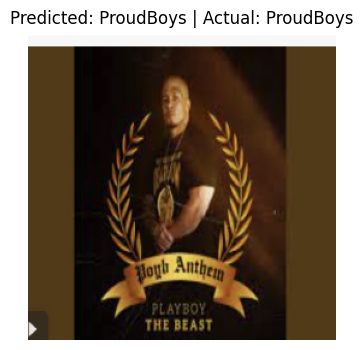

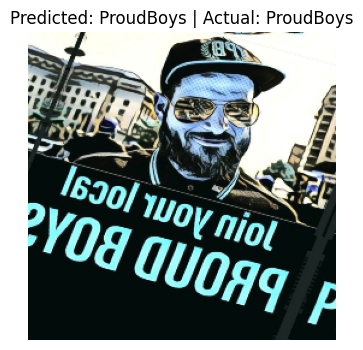

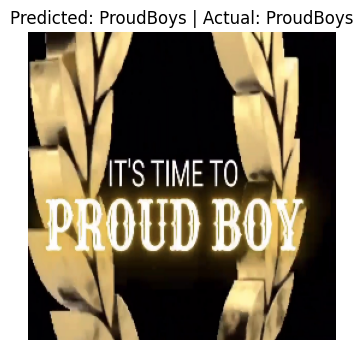

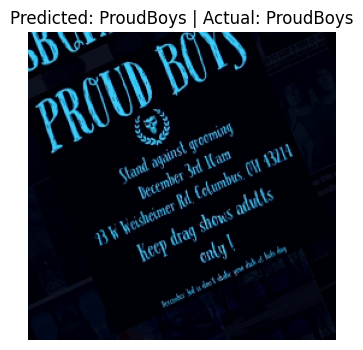

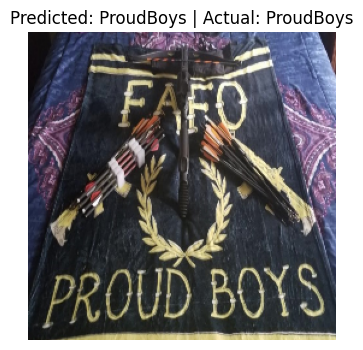

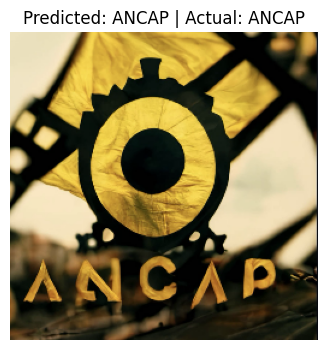

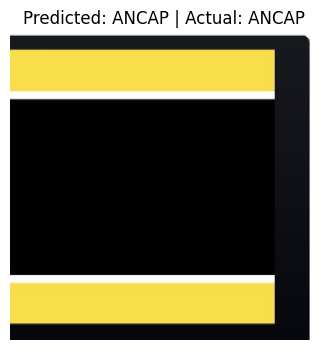

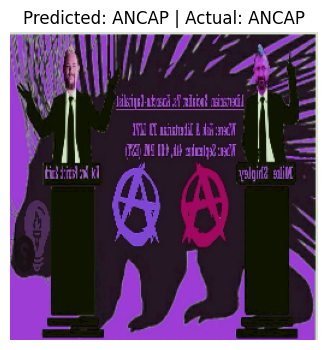

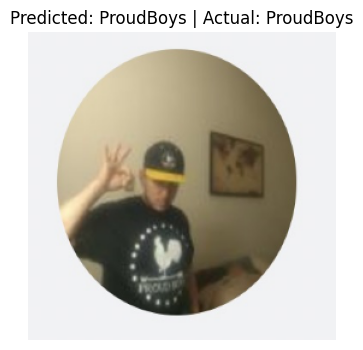

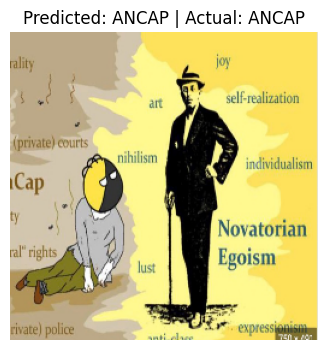

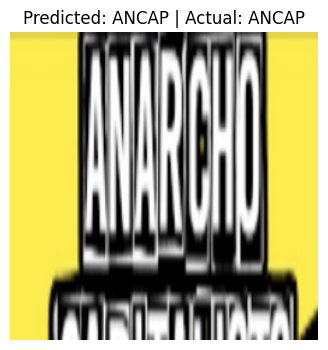

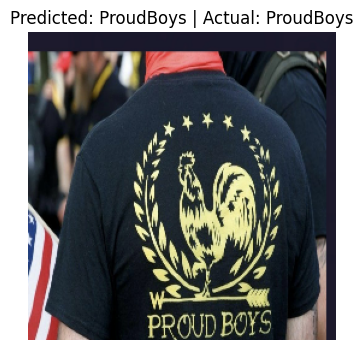

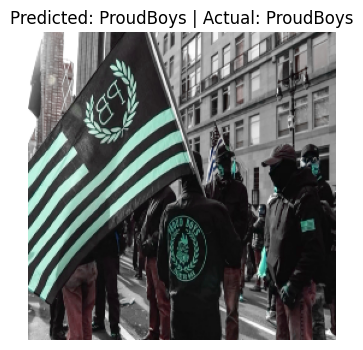

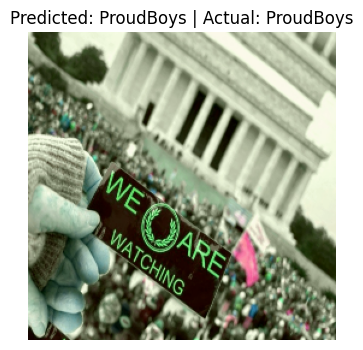

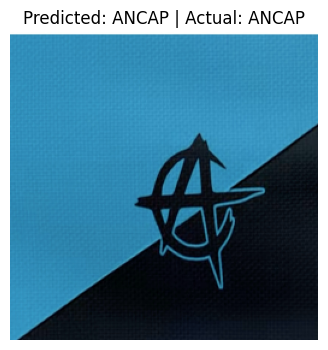

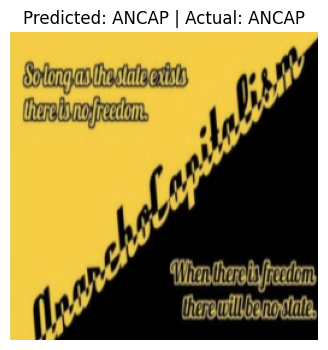

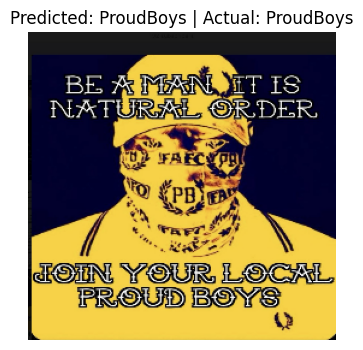

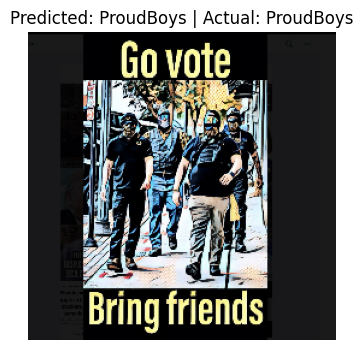

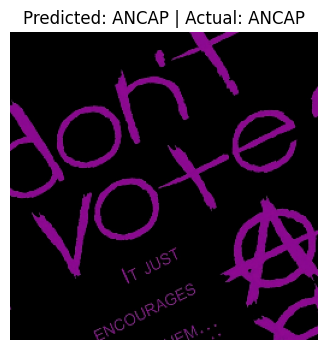

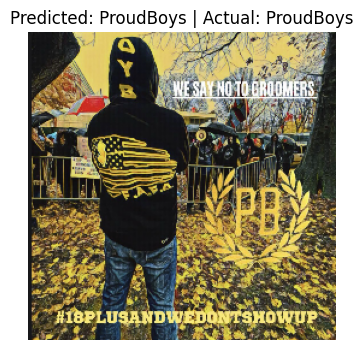

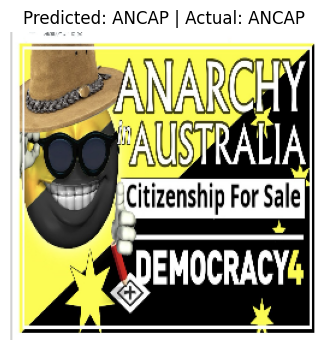

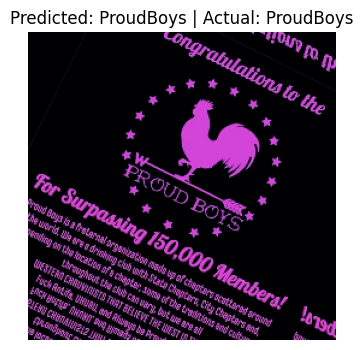

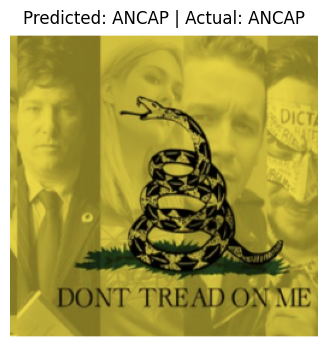

In [42]:
import matplotlib.pyplot as plt

def predict_and_display_test_set(test_set, model, num_images=30):
    # Counter for number of images displayed
    displayed_images = 0
    
    # Iterate over the test set
    for images, labels in test_set.as_numpy_iterator():
        # Get predictions for the batch
        batch_predictions = model.predict(images)

        # Convert predictions to binary labels (0 or 1)
        batch_predictions = [1 if pred > 0.5 else 0 for pred in batch_predictions]

        # Display images with predictions
        for i, (image, pred, label) in enumerate(zip(images, batch_predictions, labels)):
            plt.figure(figsize=(4, 4))
            # Normalize the image for display if necessary
            plt.imshow(image.astype("uint8"))
            plt.title(f"Predicted: {'ProudBoys' if pred == 1 else 'ANCAP'} | Actual: {'ProudBoys' if label == 1 else 'ANCAP'}")
            plt.axis('off')
            plt.show()
            
            displayed_images += 1
            if displayed_images >= num_images:
                return  # Stop after displaying the specified number of images

# Make predictions on the test set and display them
predict_and_display_test_set(test, model) 